In [1]:
import nest


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug  5 2024 06:09:47

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
Authorization required, but no authorization protocol specified

Authorization required, but no authorization protocol specified



In [2]:
import matplotlib.pyplot as plt
import nest
neuron = nest.Create("iaf_psc_alpha")

In [3]:
neuron.get()

{'archiver_length': 0,
 'beta_Ca': 0.001,
 'C_m': 250.0,
 'Ca': 0.0,
 'E_L': -70.0,
 'element_type': 'neuron',
 'frozen': False,
 'global_id': 1,
 'I_e': 0.0,
 'local': True,
 'model': 'iaf_psc_alpha',
 'model_id': 50,
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('I_syn_ex', 'I_syn_in', 'V_m'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_m': 10.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 2.0,
 'tau_syn_in': 2.0,
 'thread': 0,
 'thread_local_id': -1,
 'V_m': -70.0,
 'V_min': -inf,
 'V_reset': -70.0,
 'V_th': -55.0,
 'vp': 0}

In [4]:
neuron.get("I_e")
neuron.get(["V_reset", "V_th"])

{'V_reset': -70.0, 'V_th': -55.0}

In [5]:
neuron.set(I_e=376.0)

In [6]:
neuron.set({"I_e": 376.0})

In [7]:
neuron.I_e = 376.0
neuron.I_e

376.0

In [8]:
multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

In [9]:
spikerecorder = nest.Create("spike_recorder")

In [10]:
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikerecorder)

In [11]:
nest.Simulate(1000.0)


Nov 01 15:10:40 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Nov 01 15:10:40 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Nov 01 15:10:40 SimulationManager::run [Info]: 
    Simulation finished.


In [12]:
dmm = multimeter.get()
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

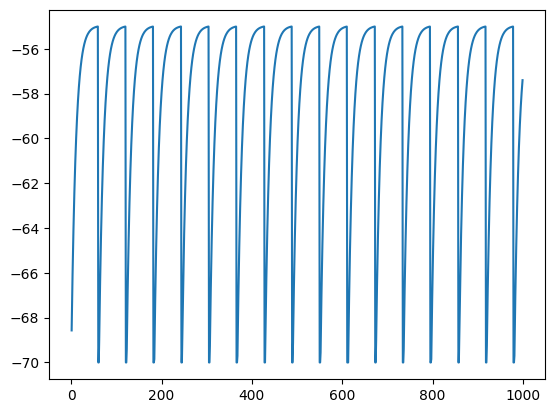

In [13]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(ts, Vms)

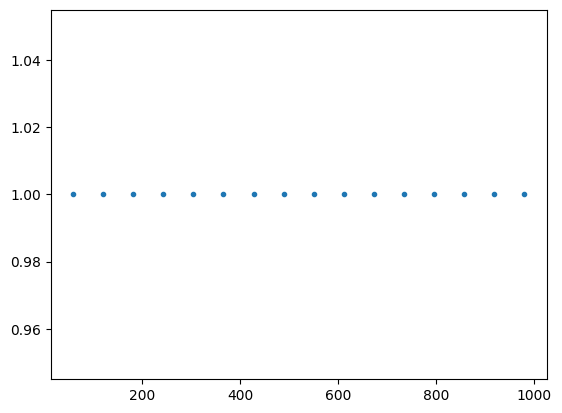

In [14]:
events = spikerecorder.get("events")
senders = events["senders"]
ts = events["times"]
plt.figure(2)
plt.plot(ts, senders, ".")
plt.show()

In [8]:
import nest

In [9]:
import matplotlib.pyplot as plt
import nest
neuron = nest.Create("iaf_psc_alpha")

In [10]:
neuron.get()

{'archiver_length': 0,
 'beta_Ca': 0.001,
 'C_m': 250.0,
 'Ca': 0.0,
 'E_L': -70.0,
 'element_type': 'neuron',
 'frozen': False,
 'global_id': 4,
 'I_e': 0.0,
 'local': True,
 'model': 'iaf_psc_alpha',
 'model_id': 50,
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('I_syn_ex', 'I_syn_in', 'V_m'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_m': 10.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 2.0,
 'tau_syn_in': 2.0,
 'thread': 0,
 'thread_local_id': -1,
 'V_m': -70.0,
 'V_min': -inf,
 'V_reset': -70.0,
 'V_th': -55.0,
 'vp': 0}

In [11]:
neuron.get("I_e")
neuron.get(["V_reset", "V_th"])

{'V_reset': -70.0, 'V_th': -55.0}

In [12]:
multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

In [13]:
spikerecorder = nest.Create("spike_recorder")

In [ ]:
noise_ex = nest.Create("poisson_generator") #기본 연결과 달라진 점 1
noise_in = nest.Create("poisson_generator") #흥분성&억제성 추가; poisson_generator
noise_ex.set(rate=80000.0)
noise_in.set(rate=15000.0)

In [ ]:
neuron.set(I_e=0.0) #달라진 점 2; 일정한 입력 전류가 0

In [ ]:
syn_dict_ex = {"weight": 1.2} #1.2pA의 시냅스 후 전류 / 달라진 점 3 
syn_dict_in = {"weight": -2.0} #-2.0pA의 억제 이벤트
nest.Connect(noise_ex, neuron, syn_spec=syn_dict_ex)
nest.Connect(noise_in, neuron, syn_spec=syn_dict_in)

In [ ]:
neuron.I_e = 0.0  ##나머지는 기본 연결 부분과 똑같음, 그래도 확실히 응용하려면
neuron.I_e        ##여러 예시를 보고 따라하되 용어 정리도 하며 감을 잡아야 됨

0.0

In [18]:
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikerecorder)

In [19]:
nest.Simulate(1000.0)


Nov 04 01:35:44 NodeManager::prepare_nodes [Info]: 
    Preparing 8 nodes for simulation.

Nov 04 01:35:44 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 8
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Nov 04 01:35:44 SimulationManager::run [Info]: 
    Simulation finished.


In [20]:
dmm = multimeter.get()
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

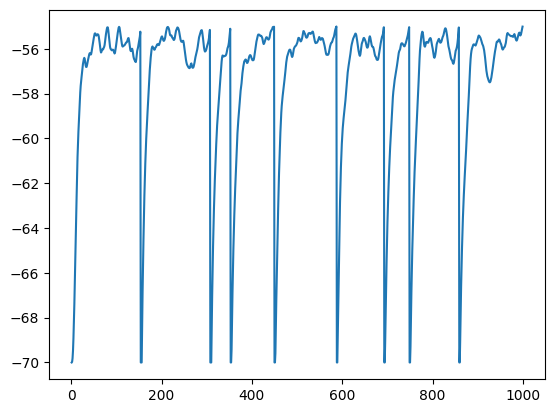

In [22]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(ts, Vms)

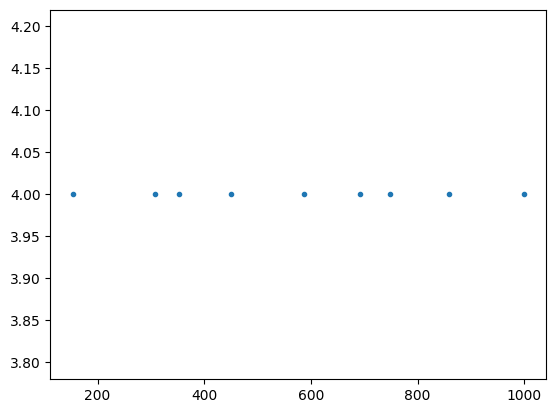

In [23]:
events = spikerecorder.get("events")
senders = events["senders"]
ts = events["times"]
plt.figure(2)
plt.plot(ts, senders, ".")
plt.show()